In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.DataFrame.from_csv("../datasets/cleaned-loan-defaulter-dataset.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,0.072210,0.000000,0.209160,0.75,1.0,2,1
LP001003,1,1,1,0,0,0.056580,0.036192,0.182857,0.75,1.0,0,0
LP001005,1,1,0,0,1,0.037037,0.000000,0.094286,0.75,1.0,2,1
LP001006,1,1,0,1,0,0.031889,0.056592,0.171429,0.75,1.0,2,1
LP001008,1,0,0,0,0,0.074074,0.000000,0.201429,0.75,1.0,2,1


In [3]:
X = df[df.columns[0:-1]] # features
y = df[df.columns[-1]] # target variable

print(X.shape, y.shape)

(614, 11) (614,)


## Simple Validation

In [4]:
# splti the data into tarining and testing data: 80% training and 20% testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1987)

In [5]:
print("Training Data:", Xtrain.shape, ytrain.shape)
print("Testing Data:", Xtest.shape, ytest.shape)

Training Data: (491, 11) (491,)
Testing Data: (123, 11) (123,)


In [6]:
# initiate an instance of the function
model = LogisticRegression()

# fit the model on the training data
model.fit(Xtrain, ytrain)

# predict the out come: test on the testing data
ytest_predicted = model.predict(Xtest)

In [9]:
# chech the accuracy
print(accuracy_score(ytest, ytest_predicted))

0.788617886179


## Cross-Validation

In [10]:
from sklearn.cross_validation import cross_val_score

In [12]:
# initiate the logistic function
model = LogisticRegression()

# cross validate the model
score = cross_val_score(model, X, y, cv=32) # cv is the number of data folds

for x in range(len(score)):
    print("Fold ",x, ":", score[x])

Fold  0 : 0.8
Fold  1 : 0.85
Fold  2 : 0.8
Fold  3 : 0.85
Fold  4 : 0.9
Fold  5 : 0.7
Fold  6 : 0.789473684211
Fold  7 : 0.684210526316
Fold  8 : 0.789473684211
Fold  9 : 0.842105263158
Fold  10 : 0.736842105263
Fold  11 : 0.736842105263
Fold  12 : 0.789473684211
Fold  13 : 0.789473684211
Fold  14 : 0.736842105263
Fold  15 : 0.842105263158
Fold  16 : 0.736842105263
Fold  17 : 0.789473684211
Fold  18 : 0.789473684211
Fold  19 : 0.842105263158
Fold  20 : 0.894736842105
Fold  21 : 0.842105263158
Fold  22 : 0.894736842105
Fold  23 : 0.789473684211
Fold  24 : 0.894736842105
Fold  25 : 0.842105263158
Fold  26 : 0.736842105263
Fold  27 : 0.736842105263
Fold  28 : 0.947368421053
Fold  29 : 0.842105263158
Fold  30 : 0.842105263158
Fold  31 : 0.789473684211


In [13]:
print("Mean Score:", score.mean())

Mean Score: 0.807730263158


In [14]:
# cv value: folding value
cv_range = [8, 16, 32, 64, 128]
predicted_score = []

# initiate the logistic function
model = LogisticRegression()

# cross validate the model
for i in range(len(cv_range)):
    # cross_val_score takes care of data split
    score = cross_val_score(model, X, y, cv=cv_range[i], scoring='accuracy')
    #for x in range(len(score)):
        #print("Fold ",x, ":", score[x])
    predicted_score.append(score.mean())
    print('CV ', cv_range[i], ' = ', predicted_score[i])

CV  8  =  0.807886192755
CV  16  =  0.807987516869
CV  32  =  0.807730263158
CV  64  =  0.808680555556
CV  128  =  0.815625


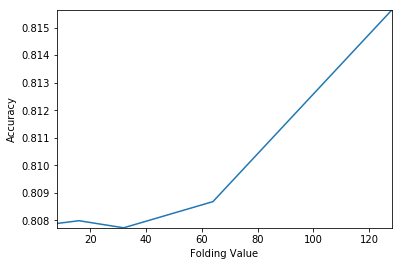

In [20]:
# fire up the matplotlib package
import matplotlib.pyplot as plt

# plot the graph
plt.plot(cv_range, predicted_score)
plt.xlabel('Folding Value')
plt.ylabel('Accuracy')
plt.axis([min(cv_range), max(cv_range), min(predicted_score), max(predicted_score)])
plt.show()

Make sure to consider the fact that higher value of folding with a imited amount of data can run into over-fitting.